<a href="https://colab.research.google.com/github/Sammy-Mutua/DSC14B-WEEK-9-IP---Samuel-Mutua/blob/main/Gaussian_Naive_Bayes_Classifier_Samuel_Mutua_Week_9_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Independent Project week 9 - Naive Bayes Classifier

## 1. Defining the Question

### a) Specifying the Question


> Implement a Naive Bayes classifier on the provided dataset. From the dataset given, we can make predictions on the genders that were in the train whether it was male or female.


### b) Defining the Metric for Success

> Come up with the best optimal a Naive Bayes classifier on the provided dataset.

 

### c) Understanding the context 

> we have been provided with a relevant dataset to perform the analysis and fit the model. The data available for this project was collected by UCI Machine Learning Centre. It is a collection of spam e-mails that came from their postmaster and individuals who had filed spam

### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, and bivariate analysis recording your observations.
6. Randomly partition each dataset into two parts i.e 80 - 20 sets
7. Performing perform classification of the testing set samples using the Naive Bayes Classifier.
8.  Compute the accuracy (percentage of correct classification).
Report the confusion matrix of each classifier.
9. Repeat step 6 to step 7 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
10. Suggest and apply at least one of the optimization techniques that you learned earlier this week. Provide further recommendations to improve both classifiers.
Provide a recommendation based on your analysis.

### e) Data Relevance

## 2. Reading the Data

In [ ]:
# Importing Libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
sp = pd.read_csv(url, sep=',', names=['word_freq_make', 'word_freq_address', 'word_freq_all',
'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
'char_freq_[', 'char_freq_!', 'char_freq_$','char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
'capital_run_length_total', 'Type'])

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
sp.shape

(4601, 58)

In [ ]:
# Previewing the top of our dataset
#
sp.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Previewing the bottom of our dataset
# 
sp.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Checking the data types
sp.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## 4. Tidying the Dataset

In [ ]:
# Checking count for null values
#
sp.isnull().sum()



word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
# Checking for Duplicates
#
sp.duplicated().any()

True

In [ ]:
# Checking for sum of duplicates
#
sp.duplicated().sum()

391

In [ ]:
# Dropping the duplicates
#
sp1 = sp.drop_duplicates()

In [ ]:
# confirming if duplicates have been dropped
#
sp1.duplicated().sum()

0

In [ ]:
# Previewing the dataset
sp1.shape

(4210, 58)

In [ ]:
# describing the numerical features
sp1.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


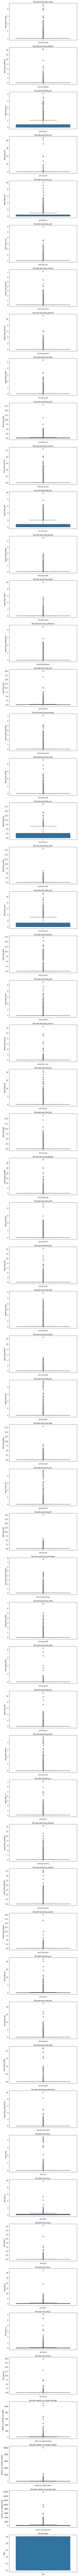

In [ ]:
# Checking for outliers
plt.show()

fig, ax = plt.subplots(len(sp.columns), figsize = (8, 310))

for i, col_val in enumerate(sp.columns):

  sns.boxplot(y= sp[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

In [ ]:
# Dealing with outliers
Q1 = sp1.quantile(0.25)
Q3 = sp1.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
sp2 = sp1[~((sp1 < (Q1 - 1.5 * IQR)) | (sp1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(sp2.shape)

# Printing the shape of our old dataset
print(sp1.shape)

(114, 58)
(4210, 58)


## 5. Exploratory Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations
#
# Frequency distribution of values in variables
for var in sp1.columns:
    
    print(sp[var].value_counts())

0.00    3548
0.10      51
0.09      41
0.17      38
0.08      34
        ... 
1.36       1
2.35       1
1.01       1
2.12       1
0.88       1
Name: word_freq_make, Length: 142, dtype: int64
0.00     3703
14.28      35
0.08       27
0.10       24
0.17       24
         ... 
1.72        1
2.46        1
4.16        1
0.92        1
2.01        1
Name: word_freq_address, Length: 171, dtype: int64
0.00    2713
0.32      49
0.29      41
0.55      39
0.36      29
        ... 
2.25       1
2.91       1
1.79       1
1.43       1
2.35       1
Name: word_freq_all, Length: 214, dtype: int64
0.00     4554
0.58        2
0.42        2
0.17        2
0.21        2
35.46       2
0.57        1
0.44        1
7.07        1
1.33        1
1.29        1
19.73       1
0.04        1
0.60        1
1.35        1
0.11        1
0.14        1
0.15        1
0.87        1
0.13        1
0.55        1
42.73       1
19.16       1
0.06        1
0.52        1
0.16        1
0.19        1
0.95        1
5.03        1
7.18    

In [ ]:
# brief statistical summary
sp1.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
# Checking for correlation
correlations = sp1.corr()
correlations

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,...,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,...,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,...,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,...,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,...,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,...,-0.021744,-0.011584,-0.016729,0.058121,0.105927,0.020413,-0.013554,0.065709,0.063403,0.212311
word_freq_remove,0.011061,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,...,-0.034080,-0.061318,-0.029466,0.050992,0.067236,0.049306,0.039174,0.050825,-0.017081,0.334456
word_freq_internet,-0.004370,0.013706,0.007221,0.003801,0.023411,0.079704,0.033692,1.000000,0.106890,0.079045,...,-0.028976,-0.042751,-0.021383,0.029031,0.053569,-0.008121,0.009977,0.035603,0.036895,0.200666
word_freq_order,0.103842,0.053426,0.077561,-0.001040,0.014483,0.097037,0.049238,0.106890,1.000000,0.123366,...,-0.015004,-0.037377,0.017321,0.035937,0.152457,-0.002075,0.110788,0.166299,0.233198,0.221454
word_freq_mail,0.040829,0.184304,0.025138,-0.003845,0.027233,0.010099,0.055695,0.079045,0.123366,1.000000,...,0.006772,-0.004960,0.003800,0.031602,0.077405,0.034482,0.073128,0.101546,0.078587,0.131686


In [ ]:
# checking on the highly correlated features
correlation_matrix = sp1.corr()
correlated_features=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
print("The highly correlated features are;",correlated_features)


The highly correlated features are; ['word_freq_415', 'word_freq_direct', 'word_freq_direct']


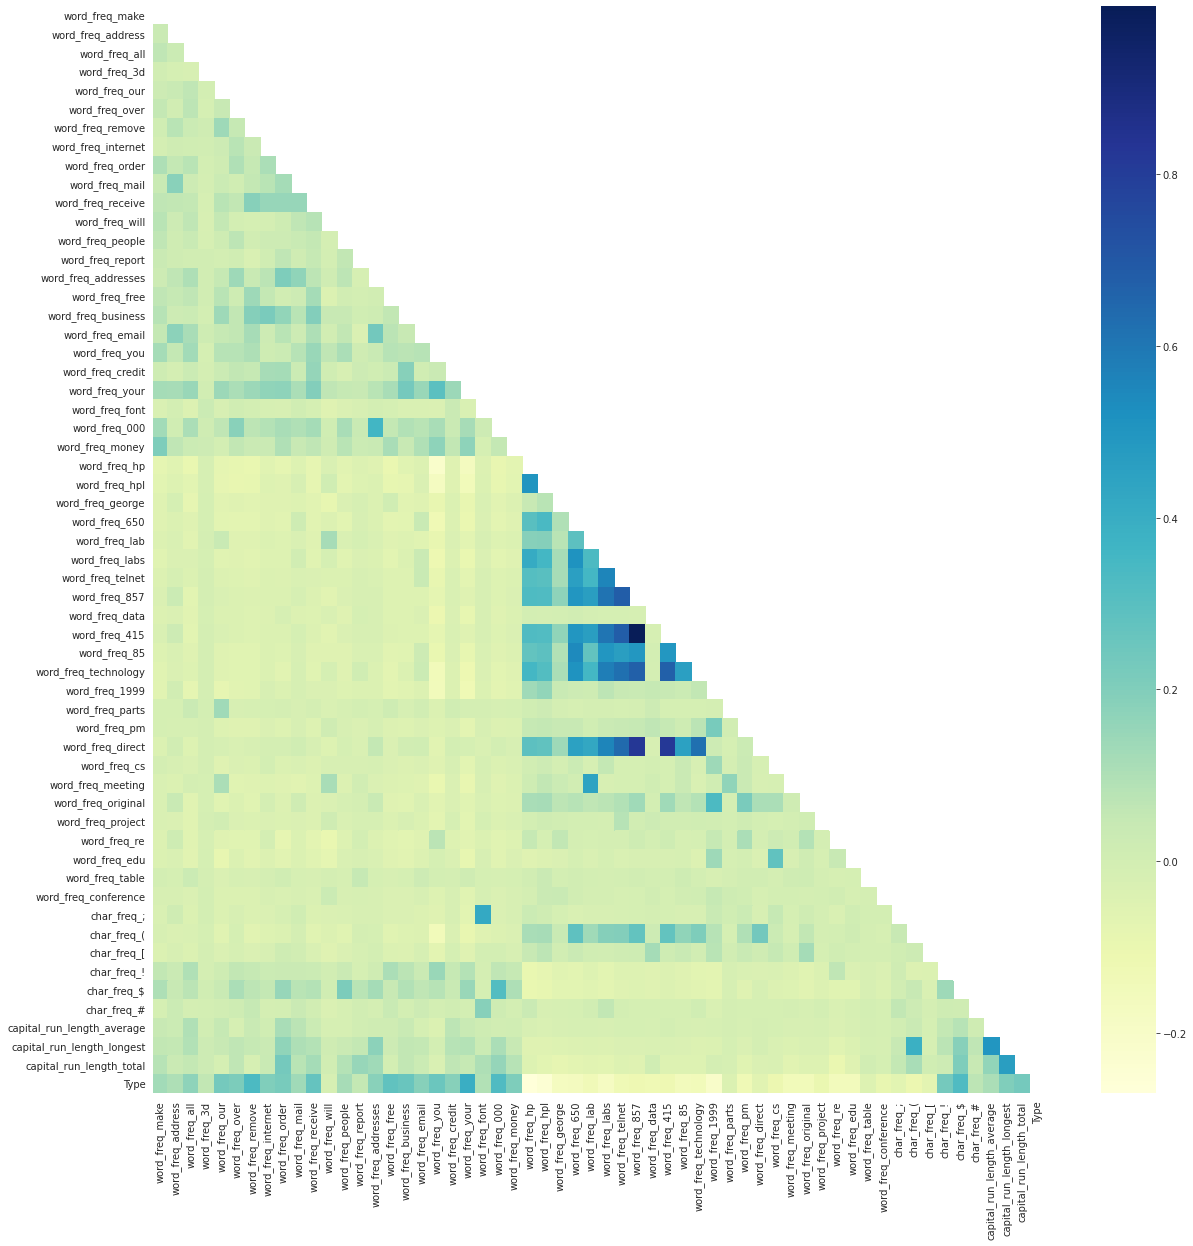

In [ ]:
# Visualizing via correlation matrix
import seaborn as sns
mask = np.zeros_like(sp1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,20))
    ax = sns.heatmap(sp1.corr(),
mask=mask,annot=False,linecolor='black',cmap="YlGnBu",)

In [ ]:
# Checking for Multicollinearity
# Finding multicollinearity using VIF
# 
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X = sp1.iloc[:,:-1]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data);

                       feature         VIF
0               word_freq_make    1.229407
1            word_freq_address    1.173538
2                word_freq_all    1.400882
3                 word_freq_3d    1.006264
4                word_freq_our    1.324950
5               word_freq_over    1.192613
6             word_freq_remove    1.215999
7           word_freq_internet    1.173639
8              word_freq_order    1.314221
9               word_freq_mail    1.275207
10           word_freq_receive    1.293204
11              word_freq_will    1.452327
12            word_freq_people    1.179703
13            word_freq_report    1.078906
14         word_freq_addresses    1.391345
15              word_freq_free    1.174359
16          word_freq_business    1.332468
17             word_freq_email    1.326938
18               word_freq_you    2.108006
19            word_freq_credit    1.115386
20              word_freq_your    1.924680
21              word_freq_font    1.311079
22         

In [ ]:
# Dropping the 2 columns with high multicollinearity
# 
sp1.drop(['word_freq_857', 'word_freq_415'], axis=1, inplace=True)

## 6. Implementing the Solution

In [ ]:
# Implementing the Solution
# 
# Defining our x and y
# 
X = sp1.iloc[:,:-1]
y = sp1.iloc[:,-1]

In [ ]:
# Feature scaling
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#  LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)

#lda coefficients
lda.coef_

# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)

,0
char_freq_$,2.376093
word_freq_remove,1.967756
word_freq_000,1.554823
word_freq_receive,1.343132
word_freq_over,1.076594
word_freq_internet,0.804692
word_freq_free,0.789185
word_freq_our,0.746832
word_freq_direct,0.721612
word_freq_money,0.692590


#### Naive Bayes Classifier

a) Splitting the data 80-20

In [ ]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
import numpy as np
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# We'll use the first 10 features, as per the LDA analysis
X = sp1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over',
         'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = sp1.iloc[:,-1].values

In [ ]:
# normalty test on our data using shapiro-wilk test
# importing the shapiro function
# 
from scipy.stats import shapiro 
stat, p = shapiro(sp1)
print(stat,p)
print('statistics=%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian')

else:
  print('Sample does not look Gaussian');

0.03758198022842407 0.0
statistics=0.038, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Normalizing our data since it is not normally distributed
# 
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l1')
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
837,1,1
838,1,1
839,0,0
840,0,0


In [ ]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.827790973871734

In [ ]:
# finding the clssification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       495
           1       0.89      0.67      0.76       347

    accuracy                           0.83       842
   macro avg       0.84      0.80      0.81       842
weighted avg       0.84      0.83      0.82       842

[[465  30]
 [115 232]]
Accuracy score:  0.827790973871734


b) Splitting the data 70-30

In [ ]:
# since our data is made of continuous variables we'll use Gaussian Naibe Bayes Classifier
# specify our x and y 
# 

X = sp1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over',
         'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = sp1.iloc[:,-1].values

In [ ]:
# Normalizing our data
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l1')
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1258,1,1
1259,1,1
1260,1,1
1261,0,0


In [ ]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.8392715756136183

In [ ]:
# finding the clssification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       737
           1       0.89      0.70      0.78       526

    accuracy                           0.84      1263
   macro avg       0.85      0.82      0.83      1263
weighted avg       0.85      0.84      0.84      1263

[[692  45]
 [158 368]]
Accuracy score:  0.8392715756136183


c) Splitting the data 60-40

In [ ]:
# since our data is made of continuous variables we'll use Gaussian Naibe Bayes Classifier
# specify our x and y 
# 

X = sp1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over',
         'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = sp1.iloc[:,-1].values

In [ ]:
# Normalizing our data
from sklearn.preprocessing import Normalizer

# create a normalizer object
normalizer = Normalizer(norm='l1')
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# split our data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [ ]:
# training our model
# 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# making predictions with our trained model
# 
y_pred = gnb.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1679,0,0
1680,1,0
1681,0,0
1682,0,0


In [ ]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.8402612826603325

In [ ]:
# finding the classification report and confusion matrix
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       994
           1       0.88      0.70      0.78       690

    accuracy                           0.84      1684
   macro avg       0.85      0.82      0.83      1684
weighted avg       0.85      0.84      0.84      1684

[[930  64]
 [205 485]]
Accuracy score:  0.8402612826603325


## 7. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Challenging the Solution 
#
X = sp1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over',
         'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = sp1.iloc[:,-1].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,842.000000,842.000000
mean,0.412114,0.413302
std,0.492508,0.492719
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# To check the performance of our model
# 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('The accuracy score is :', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score is : 0.8705463182897862
[[440  55]
 [ 54 293]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       495
           1       0.84      0.84      0.84       347

    accuracy                           0.87       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.87      0.87      0.87       842



## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

yes

### b). Do we need other data to answer our question?

some more data was needed inorder to get more meaning in regards to the features.

### c). Did we have the right question?

Yes we did